# Import Library ที่ต้องใช้

In [1]:
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# สร้างฟังก์ชั่นสำหรับกลยุทธย์การเทรด

In [2]:
def macrossover(stock, shortMA, longMA, start_date, end_date):
    #โหลดข้อมูลจาก Yahoo Finance
    stock = data.DataReader(ticker, 'yahoo', start=start_date, end=end_date)
    #สร้าง Moving Average ทั้งแบบ Short และ Long
    stock['shortMA'] = np.round(stock['Close'].rolling(window=shortMA).mean(), 4)
    stock['longMA'] = np.round(stock['Close'].rolling(window=longMA).mean(), 4)
    #ลบฟิลที่มีค่า NA ออกไป
    stock.dropna(inplace=True)
    #สร้างสัญญาณการซื้อขาย ถ้าเป็นจริง
    stock['position'] = np.where(stock['shortMA'] > stock['longMA'], 1, 0)
    #คำนวณ Rate of Change รายวัน
    stock['rets'] = np.log(stock['Close'] / stock['Close'].shift(1))
    #คำนวณผลลัพธ์จากการซื้อขาย
    stock['strategy'] = stock['position'].shift(1) * stock['rets']
    #คำนวณ Sharpe Ratio และ Return ของผลการเทรดเพื่อส่งผลลัพธ์ออกจาก Function
    sharpe = np.sqrt(252) * (stock['strategy'].mean() / stock['strategy'].std())
    rets = stock['strategy'].cumsum()[-1]
    
    return rets, sharpe

# กำหนด พารามิเตอร์สำหรับ Moving Average ทั้ง Short และ Long

In [3]:
short = np.linspace(10,30,10,dtype=int)
long = np.linspace(40,60,10,dtype=int)

In [4]:
print("Short Moving Average :", short, "Long Moving Average :", long)

Short Moving Average : [10 12 14 16 18 21 23 25 27 30] Long Moving Average : [40 42 44 46 48 51 53 55 57 60]


# สร้างอาเรย์สำหรับเก็บผลลัพธ์ Return และ Sharpe Ratio

In [5]:
profit = np.zeros((len(short),len(long)))
sharperatio = np.zeros((len(short),len(long)))

In [6]:
profit

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# กำหนดหุ้นและวันเริ่มและวันจบ

In [7]:
#ชื่อหุ้นที่เราต้องการจะทดลอง
ticker = 'CPALL.BK'
#กำหนด start และ end date
start_date = '2013/01/01'
end_date = '2017/03/31'

# วนลูปทดลอง

In [8]:
for i, s in enumerate(short):
    for j, l in enumerate(long):
        #เรียกฟังก์ชั่น macrossover()ที่กำหนดไว้ด้านบน
        rets, sharpe = macrossover(ticker, s, l,start_date ,end_date)
        profit[i,j] = rets
        sharperatio[i,j] = sharpe

# Visualize data

In [9]:
profit

array([[ 0.30827274,  0.30253589,  0.36858733,  0.38386631,  0.40860865,
         0.3938599 ,  0.47672947,  0.49574944,  0.55276384,  0.59268373],
       [ 0.34293378,  0.41064862,  0.41170326,  0.40429879,  0.47470315,
         0.5603198 ,  0.55165951,  0.49835768,  0.53577899,  0.55856279],
       [ 0.43435154,  0.44209771,  0.47060092,  0.45383288,  0.4918793 ,
         0.547415  ,  0.54118475,  0.55425216,  0.50265866,  0.56228421],
       [ 0.49343621,  0.47934901,  0.47702096,  0.47897151,  0.56661567,
         0.66497436,  0.61952031,  0.61879186,  0.61866027,  0.6250419 ],
       [ 0.39018759,  0.48530015,  0.54487382,  0.5602073 ,  0.54875108,
         0.60363577,  0.61782674,  0.58573766,  0.57264009,  0.57857953],
       [ 0.46490574,  0.5146508 ,  0.50446362,  0.41292064,  0.39419596,
         0.50280093,  0.47673155,  0.49715773,  0.51621827,  0.54088848],
       [ 0.42563686,  0.54095377,  0.38819302,  0.40940276,  0.37614795,
         0.53791043,  0.55382174,  0.52479169

In [10]:
sharperatio

array([[ 0.40232519,  0.39285347,  0.48270828,  0.50378061,  0.53431255,
         0.52800789,  0.64438292,  0.67205081,  0.74832047,  0.80309327],
       [ 0.45176966,  0.54254241,  0.54289877,  0.53317336,  0.63244375,
         0.74923124,  0.73993479,  0.66696513,  0.72691543,  0.7578914 ],
       [ 0.56649636,  0.57776147,  0.6272295 ,  0.60321052,  0.65595111,
         0.73160606,  0.72607426,  0.74393111,  0.68162042,  0.76382796],
       [ 0.64446303,  0.62591601,  0.62476082,  0.62920426,  0.74826766,
         0.89676641,  0.84079074,  0.84298914,  0.85061   ,  0.85862066],
       [ 0.51104121,  0.63176647,  0.72411118,  0.74621091,  0.73873256,
         0.81484293,  0.84317745,  0.81267422,  0.79318721,  0.80267859],
       [ 0.62308597,  0.69294953,  0.67221958,  0.55487877,  0.52926668,
         0.68849844,  0.65694792,  0.68627602,  0.71439531,  0.75251292],
       [ 0.57996789,  0.73482964,  0.52025406,  0.5490943 ,  0.5055726 ,
         0.7254366 ,  0.75113293,  0.72149459

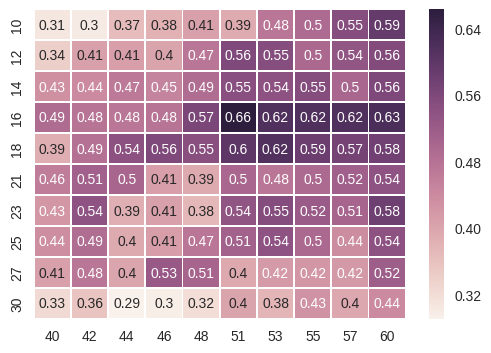

In [11]:
sns.heatmap(profit, xticklabels=long, yticklabels=short, annot=True, linewidths=.5)

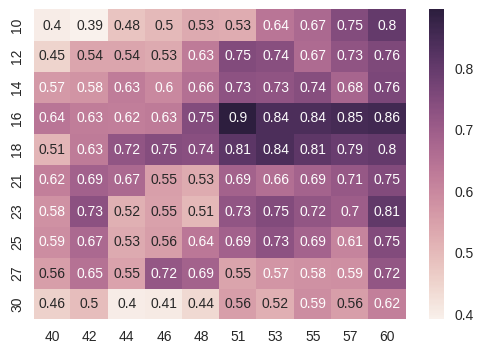

In [12]:
sns.heatmap(sharperatio, xticklabels=long, yticklabels=short, annot=True)

In [14]:
macrossover(ticker, 16, 51,start_date ,end_date)

(0.66497435864314536, 0.89676641148577541)